In [47]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.svm import SVC


#데이터

In [48]:
noise = 0.1

In [49]:
X, Y = make_circles(n_samples = 1000, noise = noise)

In [50]:
X.shape

(1000, 2)

In [51]:
Y.shape

(1000,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
X_train.shape

(800, 2)

In [55]:
X_test.shape

(200, 2)

In [56]:
y_test.shape

(200,)

모델 정의

In [57]:
model1 = SVC(kernel = 'rbf')


In [58]:
%%time
model1.fit(X_train, y_train) #Train 데이터 만을 이용합니다

CPU times: user 20.8 ms, sys: 992 µs, total: 21.8 ms
Wall time: 24.7 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    fig = plt.figure(figsize=(7,7))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")


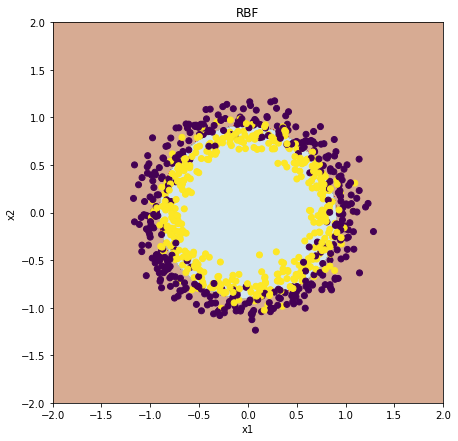

In [60]:

PlotSVM(X_train, y_train, model1, title='RBF')

In [61]:
'RBF {}'.format(noise)

'RBF 0.1'

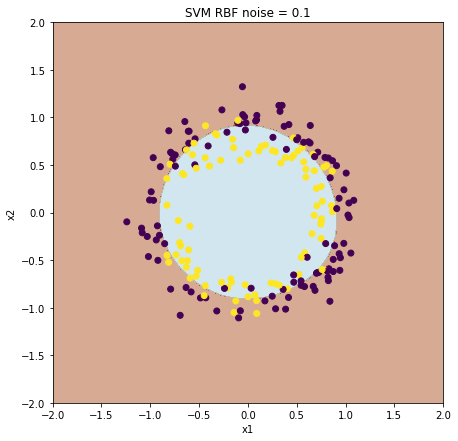

In [62]:
PlotSVM(X_test, y_test, model1, title='SVM RBF noise = {}'.format(noise))

#예측(prediction)하고 평가하기

In [63]:
predictions = model1.predict(X_test)

In [64]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1])

In [65]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0])

In [66]:
model1.score(X_test, y_test)

0.83

In [67]:
import pandas as pd

conf_matrix = pd.crosstab(y_test, predictions)
print(conf_matrix)

col_0   0   1
row_0        
0      96  15
1      19  70


In [68]:
y_test.shape

(200,)

In [69]:
predictions.shape

(200,)